# Genesis demonstrator data for machine learning

- Dataset source:  
[https://www.kaggle.com/inIT-OWL/genesis-demonstrator-data-for-machine-learning](https://www.kaggle.com/inIT-OWL/genesis-demonstrator-data-for-machine-learning)
- Epoch & Unix Timestamp Conversion Tools:  
[https://www.epochconverter.com/](https://www.epochconverter.com/)

In [191]:
import os
import datetime
import pandas as pd
import seaborn as sns
sns.set(font_scale=1.1, style='whitegrid')
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

## GenesisStateMachineLabels
The demonstrator sorts two different materials (wood and metal)
into their corresponding target locations.  
The different modules:
1. Storage magazine
1. Sensor
1. Metal storage
1. Wood storage

can be placed at any of the four positions
and the PLC program automatically adjusts for the change in location.  
(PLC: Programmable logic controller)


In [127]:
df_state = pd.read_csv('../datasets/gdd/Genesis_StateMachineLabel.csv.gz')
print(df_state.Timestamp)
df_state.Timestamp = df_state.Timestamp.apply(datetime.datetime.fromtimestamp)
df_state.dtypes
# df_state

0        1.461149e+09
1        1.461149e+09
2        1.461149e+09
3        1.461149e+09
4        1.461149e+09
             ...     
16215    1.461149e+09
16216    1.461149e+09
16217    1.461149e+09
16218    1.461149e+09
16219    1.461149e+09
Name: Timestamp, Length: 16220, dtype: float64


Timestamp                               datetime64[ns]
Label                                            int64
MotorData.ActCurrent                             int64
MotorData.ActPosition                            int64
MotorData.ActSpeed                               int64
MotorData.IsAcceleration                         int64
MotorData.IsForce                                int64
MotorData.Motor_Pos1reached                      int64
MotorData.Motor_Pos2reached                      int64
MotorData.Motor_Pos3reached                      int64
MotorData.Motor_Pos4reached                      int64
NVL_Recv_Ind.GL_Metall                           int64
NVL_Recv_Ind.GL_NonMetall                        int64
NVL_Recv_Storage.GL_I_ProcessStarted             int64
NVL_Recv_Storage.GL_I_Slider_IN                  int64
NVL_Recv_Storage.GL_I_Slider_OUT                 int64
NVL_Recv_Storage.GL_LightBarrier                 int64
NVL_Send_Storage.ActivateStorage                 int64
PLC_PRG.Gr

In [128]:
df_state.Timestamp.min(), df_state.Timestamp.max()

(Timestamp('2016-04-20 19:35:12.938000'),
 Timestamp('2016-04-20 19:47:53.354000'))

A linear drive with a pneumatic gripper transports the materials between the different stations.  
The procedure follows these steps:
1. Idle, waiting for start button press.
1. Homing, do homing when drive is not homed yet (only after first power on).
1. Move gripper to a position next to the storage module. This avoids collisions of the storage slider and the gripper when
material is ejected.
1. Eject material.
1. Move gripper to storage position.
1. Close the gripper to pick up material.
1. Move to the sensor to detect material type.
1. Move to the corresponding storage box of the detected material.
1. Open the gripper to release material.


<AxesSubplot:title={'center':'The internal state machine of the PLC code.'}>

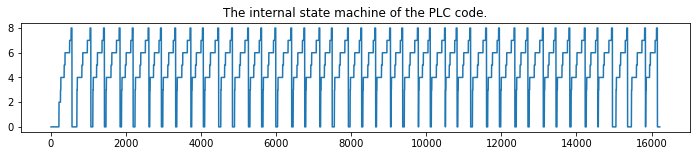

In [129]:
df_state.Label.plot(
    figsize=(12, 2),
    title='The internal state machine of the PLC code.')

<AxesSubplot:>

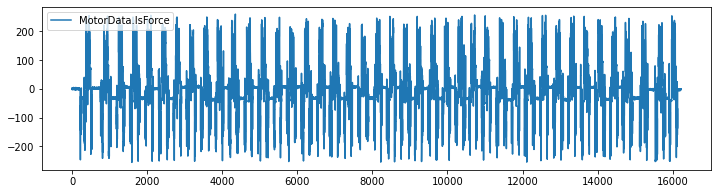

In [130]:
df_state[[
    # 'MotorData.ActCurrent',           # continuous
    # 'MotorData.ActPosition',          # continuous
    # 'MotorData.ActSpeed',             # continuous
    # 'MotorData.IsAcceleration',       # continuous
    'MotorData.IsForce',              # continuous
    # 'MotorData.Motor_Pos1reached',    # binary
    # 'MotorData.Motor_Pos2reached',    # binary
    # 'MotorData.Motor_Pos3reached',    # binary
    # 'MotorData.Motor_Pos4reached',    # binary
    # 'NVL_Recv_Ind.GL_Metall',  # binary
    # 'NVL_Recv_Ind.GL_NonMetall',  # binary
    # 'NVL_Recv_Storage.GL_I_ProcessStarted',  # binary
    # 'NVL_Recv_Storage.GL_I_Slider_IN',  # binary
    # 'NVL_Recv_Storage.GL_I_Slider_OUT',  # binary
    # 'NVL_Recv_Storage.GL_LightBarrier',  # binary
    # 'NVL_Send_Storage.ActivateStorage',  # binary
    # 'PLC_PRG.Gripper',  # binary
    # 'PLC_PRG.MaterialIsMetal',  # binary
]].plot(figsize=(12, 3), legend=True)


## Genesis_AnomalyLabels

This data is identical to GenesisStateMachineLabels except for the Label column.

In [131]:
df_anom = pd.read_csv('../datasets/gdd/Genesis_AnomalyLabels.csv.gz')
df_anom.Timestamp = df_anom.Timestamp.apply(datetime.datetime.fromtimestamp)
df_anom.dtypes
# df_anom

Timestamp                               datetime64[ns]
Label                                            int64
MotorData.ActCurrent                             int64
MotorData.ActPosition                            int64
MotorData.ActSpeed                               int64
MotorData.IsAcceleration                         int64
MotorData.IsForce                                int64
MotorData.Motor_Pos1reached                      int64
MotorData.Motor_Pos2reached                      int64
MotorData.Motor_Pos3reached                      int64
MotorData.Motor_Pos4reached                      int64
NVL_Recv_Ind.GL_Metall                           int64
NVL_Recv_Ind.GL_NonMetall                        int64
NVL_Recv_Storage.GL_I_ProcessStarted             int64
NVL_Recv_Storage.GL_I_Slider_IN                  int64
NVL_Recv_Storage.GL_I_Slider_OUT                 int64
NVL_Recv_Storage.GL_LightBarrier                 int64
NVL_Send_Storage.ActivateStorage                 int64
PLC_PRG.Gr

In [132]:
df_anom.Timestamp.min(), df_anom.Timestamp.max()

(Timestamp('2016-04-20 19:35:12.938000'),
 Timestamp('2016-04-20 19:47:53.354000'))

The anomaly Labels are manually annotated,
checked very carefully and are accurate for each data point!  
Only one type of Anomaly was simulated:
- 0: No anomaly
- 1: Linear drive jammed / tilted
- 2: Linear drive breaks free and corrects accumulated lag error


<AxesSubplot:title={'center':'Anomaly labels'}>

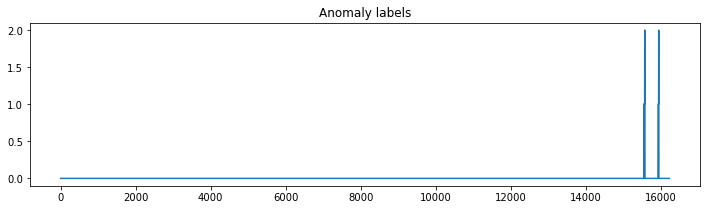

In [133]:
df_anom.Label.plot(
    figsize=(12, 3),
    title='Anomaly labels'
)

## Genesis_normal

The Demonstrator worked as intended, without any failures or restrictions.  
It can be used to compare it with other files for predictive maintenance or anomaly detection.

In [134]:
df_norm = pd.read_csv('../datasets/gdd/Genesis_normal.csv.gz')
df_norm.Timestamp = df_norm.Timestamp / 1000
df_norm.Timestamp = df_norm.Timestamp.apply(datetime.datetime.fromtimestamp)
df_norm.dtypes

Timestamp                               datetime64[ns]
MotorData.ActCurrent                             int64
MotorData.ActSpeed                               int64
MotorData.IsAcceleration                         int64
MotorData.IsForce                                int64
MotorData.Motor_Pos1reached                      int64
MotorData.Motor_Pos2reached                      int64
MotorData.Motor_Pos3reached                      int64
MotorData.Motor_Pos4reached                      int64
MotorData.SetAcceleration                        int64
MotorData.SetCurrent                             int64
MotorData.SetForce                               int64
MotorData.SetSpeed                               int64
NVL_Recv_Ind.GL_Metall                           int64
NVL_Recv_Ind.GL_NonMetall                        int64
NVL_Recv_Storage.GL_I_ProcessStarted             int64
NVL_Recv_Storage.GL_I_Slider_IN                  int64
NVL_Recv_Storage.GL_I_Slider_OUT                 int64
NVL_Recv_S

In [135]:
df_norm.Timestamp.min(),df_norm.Timestamp.max()

(Timestamp('2017-07-25 01:39:08.721000'),
 Timestamp('2017-07-25 01:44:39.079000'))

<AxesSubplot:>

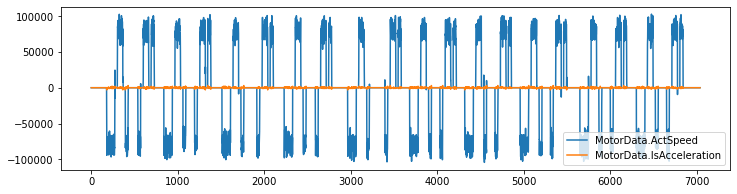

In [136]:
df_norm[[
    # 'MotorData.ActCurrent',           # continuous
    'MotorData.ActSpeed',             # continuous
    'MotorData.IsAcceleration',       # continuous
    # 'MotorData.IsForce',              # continuous
    # 'MotorData.Motor_Pos1reached',    # binary
    # 'MotorData.Motor_Pos2reached',    # binary
    # 'MotorData.Motor_Pos3reached',    # binary
    # 'MotorData.Motor_Pos4reached',    # binary
    # 'MotorData.SetAcceleration',      # continuous
    # 'MotorData.SetCurrent',           # continuous
    # 'MotorData.SetForce',             # continuous
    # 'MotorData.SetSpeed',             # continuous
    # 'NVL_Recv_Ind.GL_Metall',         # binary
    # 'NVL_Recv_Ind.GL_NonMetall',          # binary
    # 'NVL_Recv_Storage.GL_I_ProcessStarted',  # binary
    # 'NVL_Recv_Storage.GL_I_Slider_IN',    # binary
    # 'NVL_Recv_Storage.GL_I_Slider_OUT',  # binary
    # 'NVL_Recv_Storage.GL_LightBarrier',  # binary
    # 'NVL_Send_Storage.ActivateStorage',  # binary
    # 'PLC_PRG.Gripper',                # binary
    # 'PLC_PRG.MaterialIsMetal',         # binary
    # 'NVL_Recv_Storage.GL_X_TimeSlideIn',
    # 'NVL_Recv_Storage.GL_X_TimeSlideOut',
]].plot(figsize=(12, 3), legend=True)


## Genesis_lineardrive

The lineardrive was slightly impaired over time,
so that the Genesis Demonstrator does not work as intended.  
This file can be used for predictive maintenance or anomaly detection.

In [137]:
df_linear = pd.read_csv('../datasets/gdd/Genesis_lineardrive.csv.gz')
df_linear.Timestamp = df_linear.Timestamp / 1000
df_linear.Timestamp = df_linear.Timestamp.apply(datetime.datetime.fromtimestamp)
df_linear.dtypes

Timestamp                               datetime64[ns]
MotorData.ActCurrent                             int64
MotorData.ActSpeed                               int64
MotorData.IsAcceleration                         int64
MotorData.IsForce                                int64
MotorData.Motor_Pos1reached                      int64
MotorData.Motor_Pos2reached                      int64
MotorData.Motor_Pos3reached                      int64
MotorData.Motor_Pos4reached                      int64
MotorData.SetAcceleration                        int64
MotorData.SetCurrent                             int64
MotorData.SetForce                               int64
MotorData.SetSpeed                               int64
NVL_Recv_Ind.GL_Metall                           int64
NVL_Recv_Ind.GL_NonMetall                        int64
NVL_Recv_Storage.GL_I_ProcessStarted             int64
NVL_Recv_Storage.GL_I_Slider_IN                  int64
NVL_Recv_Storage.GL_I_Slider_OUT                 int64
NVL_Recv_S

In [138]:
df_linear.Timestamp.min(), df_linear.Timestamp.max()

(Timestamp('2017-07-25 01:47:44.061000'),
 Timestamp('2017-07-25 01:53:32.213000'))

<AxesSubplot:>

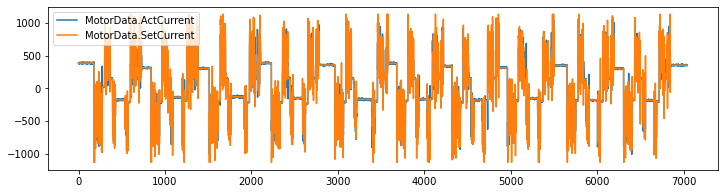

In [140]:
df_norm[[
    'MotorData.ActCurrent',           # continuous
    # 'MotorData.ActSpeed',             # continuous
    # 'MotorData.IsAcceleration',       # continuous
    # 'MotorData.IsForce',              # continuous
    # 'MotorData.Motor_Pos1reached',    # binary
    # 'MotorData.Motor_Pos2reached',    # binary
    # 'MotorData.Motor_Pos3reached',    # binary
    # 'MotorData.Motor_Pos4reached',    # binary
    # 'MotorData.SetAcceleration',      # continuous
    'MotorData.SetCurrent',           # continuous
    # 'MotorData.SetForce',             # continuous
    # 'MotorData.SetSpeed',             # continuous
    # 'NVL_Recv_Ind.GL_Metall',         # binary
    # 'NVL_Recv_Ind.GL_NonMetall',          # binary
    # 'NVL_Recv_Storage.GL_I_ProcessStarted',  # binary
    # 'NVL_Recv_Storage.GL_I_Slider_IN',    # binary
    # 'NVL_Recv_Storage.GL_I_Slider_OUT',  # binary
    # 'NVL_Recv_Storage.GL_LightBarrier',  # binary
    # 'NVL_Send_Storage.ActivateStorage',  # binary
    # 'PLC_PRG.Gripper',                # binary
    # 'PLC_PRG.MaterialIsMetal',         # binary
]].plot(figsize=(12, 3), legend=True)


## Genesis_pressure

In [147]:
df_ps = pd.read_csv('../datasets/gdd/Genesis_pressure.csv.gz')
df_ps.Timestamp = df_ps.Timestamp / 1000
df_ps.Timestamp = df_ps.Timestamp.apply(datetime.datetime.fromtimestamp)
df_ps.dtypes

Timestamp                               datetime64[ns]
MotorData.ActCurrent                             int64
MotorData.ActSpeed                               int64
MotorData.IsAcceleration                         int64
MotorData.IsForce                                int64
MotorData.Motor_Pos1reached                      int64
MotorData.Motor_Pos2reached                      int64
MotorData.Motor_Pos3reached                      int64
MotorData.Motor_Pos4reached                      int64
MotorData.SetAcceleration                        int64
MotorData.SetCurrent                             int64
MotorData.SetForce                               int64
MotorData.SetSpeed                               int64
NVL_Recv_Ind.GL_Metall                           int64
NVL_Recv_Ind.GL_NonMetall                        int64
NVL_Recv_Storage.GL_I_ProcessStarted             int64
NVL_Recv_Storage.GL_I_Slider_IN                  int64
NVL_Recv_Storage.GL_I_Slider_OUT                 int64
NVL_Recv_S

<AxesSubplot:>

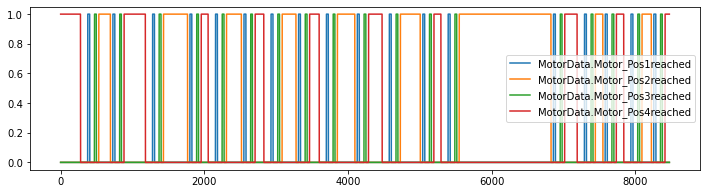

In [146]:
df_ps[[
    # 'MotorData.ActCurrent',           # continuous
    # 'MotorData.ActSpeed',             # continuous
    # 'MotorData.IsAcceleration',       # continuous
    # 'MotorData.IsForce',              # continuous
    'MotorData.Motor_Pos1reached',    # binary
    'MotorData.Motor_Pos2reached',    # binary
    'MotorData.Motor_Pos3reached',    # binary
    'MotorData.Motor_Pos4reached',    # binary
    # 'MotorData.SetAcceleration',      # continuous
    # 'MotorData.SetCurrent',           # continuous
    # 'MotorData.SetForce',             # continuous
    # 'MotorData.SetSpeed',             # continuous
    # 'NVL_Recv_Ind.GL_Metall',         # binary
    # 'NVL_Recv_Ind.GL_NonMetall',          # binary
    # 'NVL_Recv_Storage.GL_I_ProcessStarted',  # binary
    # 'NVL_Recv_Storage.GL_I_Slider_IN',    # binary
    # 'NVL_Recv_Storage.GL_I_Slider_OUT',  # binary
    # 'NVL_Recv_Storage.GL_LightBarrier',  # binary
    # 'NVL_Send_Storage.ActivateStorage',  # binary
    # 'PLC_PRG.Gripper',                # binary
    # 'PLC_PRG.MaterialIsMetal',         # binary
]].plot(figsize=(12, 3), legend=True)


In [152]:
def load_data(fp, index='state'):

    assert index in ['state', 'anomaly', 'normal', 'linear', 'pressure']

    if index == 'state':
        df = pd.read_csv(fp + '/Genesis_StateMachineLabel.csv.gz')
    elif index == 'anomaly':
        df = pd.read_csv(fp + '/Genesis_AnomalyLabels.csv.gz')
    elif index == 'normal':
        df = pd.read_csv(fp + '/Genesis_normal.csv.gz')
        df.Timestamp = df.Timestamp / 1000
    elif index == 'linear':
        df = pd.read_csv(fp + '/Genesis_lineardrive.csv.gz')
        df.Timestamp = df.Timestamp / 1000
    elif index == 'pressure':
        df = pd.read_csv(fp + '/Genesis_pressure.csv.gz')
        df.Timestamp = df.Timestamp / 1000

    df.Timestamp = df.Timestamp.apply(datetime.datetime.fromtimestamp)
    
    return df

In [216]:
# df = load_data('../datasets/gdd/', index='state')
# df = load_data('../datasets/gdd/', index='anomaly')
# df = load_data('../datasets/gdd/', index='normal')
df = load_data('../datasets/gdd/', index='linear')
# df = load_data('../datasets/gdd/', index='state')
df.head()

,Timestamp,MotorData.ActCurrent,MotorData.ActSpeed,MotorData.IsAcceleration,MotorData.IsForce,MotorData.Motor_Pos1reached,MotorData.Motor_Pos2reached,MotorData.Motor_Pos3reached,MotorData.Motor_Pos4reached,MotorData.SetAcceleration,...,NVL_Recv_Ind.GL_NonMetall,NVL_Recv_Storage.GL_I_ProcessStarted,NVL_Recv_Storage.GL_I_Slider_IN,NVL_Recv_Storage.GL_I_Slider_OUT,NVL_Recv_Storage.GL_LightBarrier,NVL_Send_Storage.ActivateStorage,PLC_PRG.Gripper,PLC_PRG.MaterialIsMetal,NVL_Recv_Storage.GL_X_TimeSlideIn,NVL_Recv_Storage.GL_X_TimeSlideOut
0,2017-07-25 01:47:44.061,344,0,0,76,0,0,0,1,77,...,1,0,1,0,1,0,0,0,240,200
1,2017-07-25 01:47:44.102,344,0,0,76,0,0,0,1,77,...,1,0,1,0,1,0,0,0,240,200
2,2017-07-25 01:47:44.151,344,0,0,76,0,0,0,1,77,...,1,0,1,0,1,0,0,0,240,200
3,2017-07-25 01:47:44.198,344,0,0,78,0,0,0,1,77,...,1,0,1,0,1,0,0,0,240,200
4,2017-07-25 01:47:44.244,340,0,0,78,0,0,0,1,77,...,1,0,1,0,1,0,0,0,240,200


In [204]:
df.dtypes

Timestamp                               datetime64[ns]
MotorData.ActCurrent                             int64
MotorData.ActSpeed                               int64
MotorData.IsAcceleration                         int64
MotorData.IsForce                                int64
MotorData.Motor_Pos1reached                      int64
MotorData.Motor_Pos2reached                      int64
MotorData.Motor_Pos3reached                      int64
MotorData.Motor_Pos4reached                      int64
MotorData.SetAcceleration                        int64
MotorData.SetCurrent                             int64
MotorData.SetForce                               int64
MotorData.SetSpeed                               int64
NVL_Recv_Ind.GL_Metall                           int64
NVL_Recv_Ind.GL_NonMetall                        int64
NVL_Recv_Storage.GL_I_ProcessStarted             int64
NVL_Recv_Storage.GL_I_Slider_IN                  int64
NVL_Recv_Storage.GL_I_Slider_OUT                 int64
NVL_Recv_S

In [221]:
def plot_genesis_labels(df, figsize=(15, 20), cmap='tab10'):
    """ Call this for machine states and anomaly labels """

    fig, ax = plt.subplots(10, figsize=figsize)

    df['MotorData.ActCurrent'].plot(ax=ax[0], legend=True, cmap=cmap)
    df['MotorData.ActPosition'].plot(ax=ax[1], legend=True, cmap=cmap)
    df['MotorData.ActSpeed'].plot(ax=ax[2], legend=True, cmap=cmap)

    df['MotorData.IsAcceleration'].plot(ax=ax[3], legend=True, cmap=cmap)
    df['MotorData.IsForce'].plot(ax=ax[4], legend=True, cmap=cmap)

    df[['MotorData.Motor_Pos1reached',    # binary
        'MotorData.Motor_Pos2reached',    # binary
        'MotorData.Motor_Pos3reached',    # binary
        'MotorData.Motor_Pos4reached',    # binary
    ]].plot(ax=ax[5], legend=True, cmap=cmap)

    df[['NVL_Recv_Ind.GL_Metall',  # binary
        'NVL_Recv_Ind.GL_NonMetall',  # binary
    ]].plot(ax=ax[6], legend=True, cmap=cmap)

    df[['NVL_Recv_Storage.GL_I_ProcessStarted',  # binary
        'NVL_Recv_Storage.GL_I_Slider_IN',  # binary
        'NVL_Recv_Storage.GL_I_Slider_OUT',  # binary
        'NVL_Recv_Storage.GL_LightBarrier',  # binary
        'NVL_Send_Storage.ActivateStorage',  # binary
    ]].plot(ax=ax[7], legend=True, cmap=cmap)

    df[['PLC_PRG.Gripper',  # binary
        'PLC_PRG.MaterialIsMetal',  # binary
    ]].plot(ax=ax[8], legend=True, cmap=cmap)

    df['Label'].plot(ax=ax[9], legend=True, cmap=cmap)

    for axi in ax:
        axi.set_xlim(0, df.shape[0])
        axi.set_ylabel('Value')

    ax[0].set_title('Date: {} to {}'.format(
        df.Timestamp.min(), df.Timestamp.max()))
    ax[-1].set_xlabel('Time')
    fig.tight_layout()

    return fig, ax

In [222]:
def plot_genesis_nonlabels(df, figsize=(15, 20), cmap='tab10'):
    """ Call this for non-labeled data """

    fig, ax = plt.subplots(8, figsize=figsize)

    df[['MotorData.SetCurrent',
        'MotorData.ActCurrent',
    ]].plot(ax=ax[0], legend=True, cmap=cmap)

    df[['MotorData.SetSpeed',
        'MotorData.ActSpeed',
    ]].plot(ax=ax[1], legend=True, cmap=cmap)

    df[['MotorData.SetAcceleration',
        'MotorData.IsAcceleration',
    ]].plot(ax=ax[2], legend=True, cmap=cmap)

    df[['MotorData.SetForce',
        'MotorData.IsForce'
    ]].plot(ax=ax[3], legend=True, cmap=cmap)

    df[['MotorData.Motor_Pos1reached',    # binary
        'MotorData.Motor_Pos2reached',    # binary
        'MotorData.Motor_Pos3reached',    # binary
        'MotorData.Motor_Pos4reached',    # binary
    ]].plot(ax=ax[4], legend=True, cmap=cmap)

    df[['NVL_Recv_Ind.GL_Metall',  # binary
        'NVL_Recv_Ind.GL_NonMetall',  # binary
    ]].plot(ax=ax[5], legend=True, cmap=cmap)

    df[['NVL_Recv_Storage.GL_I_ProcessStarted',  # binary
        'NVL_Recv_Storage.GL_I_Slider_IN',  # binary
        'NVL_Recv_Storage.GL_I_Slider_OUT',  # binary
        'NVL_Recv_Storage.GL_LightBarrier',  # binary
        'NVL_Send_Storage.ActivateStorage',  # binary
    ]].plot(ax=ax[6], legend=True, cmap=cmap)

    df[['PLC_PRG.Gripper',  # binary
        'PLC_PRG.MaterialIsMetal',  # binary
    ]].plot(ax=ax[7], legend=True, cmap=cmap)

    for axi in ax:
        axi.set_xlim(0, df.shape[0])
        axi.set_ylabel('Value')

    ax[0].set_title('Date: {} to {}'.format(df.Timestamp.min(), df.Timestamp.max()))
    ax[-1].set_xlabel('Time')

    fig.tight_layout()
    return fig, ax


## Generate a summary PDF

In [229]:
def gen_summary(fp, outdir='../out'):

    os.makedirs(outdir, exist_ok=True)
    with PdfPages(outdir + '/gdd_summary.pdf') as pp:

        df = load_data(fp, index='state')
        fig, _ = plot_genesis_labels(df)
        fig.savefig(pp, bbox_inches='tight', format='pdf')
        plt.clf()
        plt.close()

        df = load_data(fp, index='anomaly')
        fig, _ = plot_genesis_labels(df)
        fig.savefig(pp, bbox_inches='tight', format='pdf')
        plt.clf()
        plt.close()

        df = load_data(fp, index='normal')
        fig, _ = plot_genesis_nonlabels(df)
        fig.savefig(pp, bbox_inches='tight', format='pdf')
        plt.clf()
        plt.close()

        df = load_data(fp, index='linear')
        fig, _ = plot_genesis_nonlabels(df)
        fig.savefig(pp, bbox_inches='tight', format='pdf')
        plt.clf()
        plt.close()

        df = load_data(fp, index='pressure')
        fig, _ = plot_genesis_nonlabels(df)
        fig.savefig(pp, bbox_inches='tight', format='pdf')
        plt.clf()
        plt.close()

In [230]:
gen_summary('../datasets/gdd')